# Import Necessaries

In [1]:
import json
import csv
import pandas as pd
import re
from collections import defaultdict
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt
from bidi.algorithm import get_display

In [2]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Cleaning Data

In [ ]:
df = pd.read_json (r'/content/drive/My Drive/result2017.json')
df.to_csv (r'/content/drive/My Drive/result2017.csv')
data = pd.read_csv('/content/drive/My Drive/result2017.csv')
data['messages'] = data['messages'].apply(eval)
data = data[~data['messages'].apply(lambda d: ('photo' in d))]
data['messages'] = data['messages'].apply(lambda d: d.pop('text', None))
data['messages'] = data['messages'].apply(lambda x: x[0] if len(x) > 0 else '')
data['messages'] = data['messages'].str.replace(r'\n.*', '', regex=True)
data = data.drop([data.columns[0]], axis=1)
data.pop('name')
data.pop('type')
data.pop('id')
data['label'] = '2017'
data.to_csv("/content/drive/My Drive/output2017.csv", index=False)

<ipython-input-21-00829b7be73e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['messages'] = data['messages'].apply(lambda d: d.pop('text', None))
<ipython-input-21-00829b7be73e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['messages'] = data['messages'].apply(lambda x: x[0] if len(x) > 0 else '')
<ipython-input-21-00829b7be73e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [ ]:
df = pd.read_json (r'/content/drive/My Drive/result2020.json')
df.to_csv (r'/content/drive/My Drive/result2020.csv')
data = pd.read_csv('/content/drive/My Drive/result2020.csv')
data['messages'] = data['messages'].apply(eval)
data = data[~data['messages'].apply(lambda d: ('photo' in d))]
data['messages'] = data['messages'].apply(lambda d: d.pop('text', None))
data['messages'] = data['messages'].apply(lambda x: x[0] if len(x) > 0 else '')
data['messages'] = data['messages'].str.replace(r'\n\n.*', '', regex=True)
data = data.drop([data.columns[0]], axis=1)
data.pop('name')
data.pop('type')
data.pop('id')
data['label'] = '2020'
data.to_csv("/content/drive/My Drive/output2020.csv", index=False)

<ipython-input-23-eef4cea3a1f2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['messages'] = data['messages'].apply(lambda d: d.pop('text', None))
<ipython-input-23-eef4cea3a1f2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['messages'] = data['messages'].apply(lambda x: x[0] if len(x) > 0 else '')
<ipython-input-23-eef4cea3a1f2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [ ]:
df = pd.read_json (r'/content/drive/My Drive/result2023.json')
df.to_csv (r'/content/drive/My Drive/result2023.csv')
data = pd.read_csv('/content/drive/My Drive/result2023.csv')
data['messages'] = data['messages'].apply(eval)
data = data[~data['messages'].apply(lambda d: ('photo' in d))]
data['messages'] = data['messages'].apply(lambda d: d.pop('text', None))
data['messages'] = data['messages'].apply(lambda x: x[0] if len(x) > 0 else '')
data['messages'] = data['messages'].str.replace(r'\n\n.*', '', regex=True)
data = data.drop([data.columns[0]], axis=1)
data.pop('name')
data.pop('type')
data.pop('id')
data['label'] = '2023'
data.to_csv("/content/drive/My Drive/output2023.csv", index=False)

<ipython-input-24-2e702686e7f4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['messages'] = data['messages'].apply(lambda d: d.pop('text', None))
<ipython-input-24-2e702686e7f4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['messages'] = data['messages'].apply(lambda x: x[0] if len(x) > 0 else '')
<ipython-input-24-2e702686e7f4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

## Merge Data

In [ ]:
data2017 = pd.read_csv('/content/drive/My Drive/output2017.csv')
data2020 = pd.read_csv('/content/drive/My Drive/output2020.csv')
data2023 = pd.read_csv('/content/drive/My Drive/output2023.csv')
merged_data = pd.concat([data2017, data2020, data2023], ignore_index=True)
merged_data.to_csv('/content/drive/My Drive/outputAll.csv', index=False)

# Word Broken

In [8]:
df = pd.read_csv('/content/drive/My Drive/output2017.csv')

word_counts2017 = defaultdict(int)

for message in df['messages']:
  if isinstance(message, str):
    words = word_tokenize(message) 
    for word in words:
        word_counts2017[word] += 1

with open('/content/drive/My Drive/word_counts2017.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Word', 'Count'])

    for word, count in word_counts2017.items():
        writer.writerow([word, count])

In [7]:
df = pd.read_csv('/content/drive/My Drive/output2020.csv')

word_counts2020 = defaultdict(int)

for message in df['messages']:
  if isinstance(message, str):
    words = word_tokenize(message)
    for word in words:
        word_counts2020[word] += 1

with open('/content/drive/My Drive/word_counts2020.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Word', 'Count'])

    for word, count in word_counts2020.items():
        writer.writerow([word, count])

# print(word_counts['کرونا'])

In [6]:
df = pd.read_csv('/content/drive/My Drive/output2023.csv')

word_counts2023 = defaultdict(int)

for message in df['messages']:
  if isinstance(message, str):
    words = word_tokenize(message)
    for word in words:
        word_counts2023[word] += 1

with open('/content/drive/My Drive/word_counts2023.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Word', 'Count'])

    for word, count in word_counts2023.items():
        writer.writerow([word, count])

#print(word_counts['مهاجرت'])

In [5]:
df = pd.read_csv('/content/drive/My Drive/outputAll.csv')

word_countsAll = defaultdict(int)

for message in df['messages']:
  if isinstance(message, str):
    words = word_tokenize(message)
    for word in words:
        word_countsAll[word] += 1

with open('/content/drive/My Drive/word_countsAll.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Word', 'Count'])

    for word, count in word_countsAll.items():
        writer.writerow([word, count])

# Sentence Broken

In [ ]:
df = pd.read_csv('/content/drive/My Drive/output2017.csv')

sentences = []

for message in df['messages']:
    if isinstance(message, str):
        sentences.extend(sent_tokenize(message))

with open('/content/drive/My Drive/sentences2017.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Sentence'])

    for sentence in sentences:
        writer.writerow([sentence])

In [ ]:
df = pd.read_csv('/content/drive/My Drive/output2020.csv')

sentences = []

for message in df['messages']:
    if isinstance(message, str):
        sentences.extend(sent_tokenize(message))

with open('/content/drive/My Drive/sentences2020.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Sentence'])

    for sentence in sentences:
        writer.writerow([sentence])

In [ ]:
df = pd.read_csv('/content/drive/My Drive/output2023.csv')

sentences = []

for message in df['messages']:
    if isinstance(message, str):
        sentences.extend(sent_tokenize(message))

with open('/content/drive/My Drive/sentences2023.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Sentence'])

    for sentence in sentences:
        writer.writerow([sentence])

# Sentiment Analyses

In [ ]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.9 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

df = pd.read_csv('/content/drive/My Drive/output2017.csv')
analyzer = SentimentIntensityAnalyzer()

sentiment_scores = []
for message in df['messages']:
  if isinstance(message, str):
    sentiment_scores.append(analyzer.polarity_scores(str(message)))
  else:
    sentiment_scores.append(None)

sentiment_labels = []
count_neg2017 = 0
count_pos2017 = 0
count_neut2017 = 0
for score in sentiment_scores:
  if score is None:
        sentiment_labels.append('Not Available')
  else:
    if score['compound'] >= 0.05:
        sentiment_labels.append('Positive')
        count_pos2017+=1
    elif score['compound'] <= -0.05:
        sentiment_labels.append('Negative')
        count_neg2017+=1
    else:
        sentiment_labels.append('Neutral')
        count_neut2017+=1

df['sentiment_label'] = sentiment_labels
df.to_csv('/content/drive/My Drive/output2017_updated.csv', index=False)
print(f"count of positive tweets on 2017: {count_pos2017}")
print(f"count of negative tweets on 2017: {count_neg2017}")
print(f"count of neutral tweets on 2017: {count_neut2017}")

count of positive tweets on 2017: 72
count of negative tweets on 2017: 39
count of neutral tweets on 2017: 4396


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

df = pd.read_csv('/content/drive/My Drive/output2020.csv')
analyzer = SentimentIntensityAnalyzer()

sentiment_scores = []
for message in df['messages']:
  if isinstance(message, str):
    sentiment_scores.append(analyzer.polarity_scores(str(message)))
  else:
    sentiment_scores.append(None)

sentiment_labels = []
count_neg2020 = 0
count_pos2020 = 0
count_neut2020 = 0
for score in sentiment_scores:
  if score is None:
        sentiment_labels.append('Not Available')
  else:
    if score['compound'] >= 0.05:
        sentiment_labels.append('Positive')
        count_pos2020+=1
    elif score['compound'] <= -0.05:
        sentiment_labels.append('Negative')
        count_neg2020+=1
    else:
        sentiment_labels.append('Neutral')
        count_neut2020+=1

df['sentiment_label'] = sentiment_labels
df.to_csv('/content/drive/My Drive/output2020_updated.csv', index=False)
print(f"count of positive tweets on 2020: {count_pos2020}")
print(f"count of negative tweets on 2020: {count_neg2020}")
print(f"count of neutral tweets on 2020: {count_neut2020}")

count of positive tweets on 2020: 469
count of negative tweets on 2020: 69
count of neutral tweets on 2020: 4555


In [ ]:
df = pd.read_csv('/content/drive/My Drive/output2023.csv')
analyzer = SentimentIntensityAnalyzer()

sentiment_scores = []
for message in df['messages']:
  if isinstance(message, str):
    sentiment_scores.append(analyzer.polarity_scores(str(message)))
  else:
    sentiment_scores.append(None)

sentiment_labels = []
count_neg2023 = 0
count_pos2023 = 0
count_neut2023 = 0
for score in sentiment_scores:
  if score is None:
        sentiment_labels.append('Not Available')
  else:
    if score['compound'] >= 0.05:
        sentiment_labels.append('Positive')
        count_pos2023+=1
    elif score['compound'] <= -0.05:
        sentiment_labels.append('Negative')
        count_neg2023+=1
    else:
        sentiment_labels.append('Neutral')
        count_neut2023+=1

df['sentiment_label'] = sentiment_labels
df.to_csv('/content/drive/My Drive/output2023_updated.csv', index=False)
print(f"count of positive tweets on 2023: {count_pos2023}")
print(f"count of negative tweets on 2023: {count_neg2023}")
print(f"count of neutral tweets on 2023: {count_neut2023}")

count of positive tweets on 2023: 550
count of negative tweets on 2023: 67
count of neutral tweets on 2023: 4995


# Statics

## Counts

In [ ]:
data = [
        ['Label', 'Data count'],
        ['2017Negative', count_neg2017],
        ['2017Positive', count_pos2017],
        ['2017Neutral', count_neut2017],
        ['2020Negative', count_neg2020],
        ['2020Positive', count_pos2020],
        ['2020Neutral', count_neut2020],
        ['2023Negative', count_neg2023],
        ['2023Positive', count_pos2023],
        ['2023Neutral', count_neut2023]
    ]

with open('/content/drive/My Drive/statics_data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data)

data

[['Label', 'Data count'],
 ['2017Negative', 39],
 ['2017Positive', 72],
 ['2017Neutral', 4396],
 ['2020Negative', 69],
 ['2020Positive', 469],
 ['2020Neutral', 4555],
 ['2023Negative', 67],
 ['2023Positive', 550],
 ['2023Neutral', 4995]]

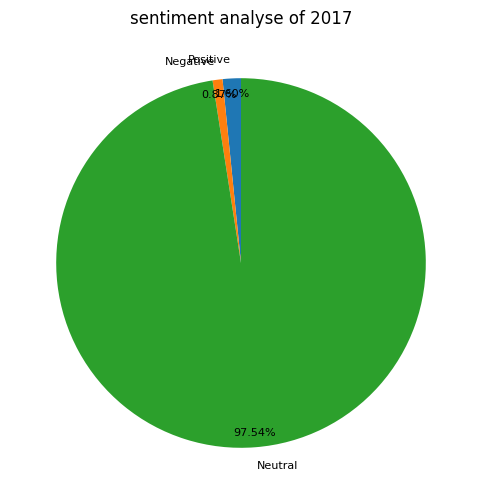

In [ ]:
categories = ['Positive', 'Negative', 'Neutral']
total = count_neg2017 + count_pos2017 + count_neut2017
values = [count_pos2017/total, count_neg2017/total, count_neut2017/total]

plt.figure(figsize=(6, 6))
plt.pie(values, labels=categories, autopct='%2.2f%%', startangle=90, pctdistance=0.92, textprops={'fontsize': 8})
plt.title('sentiment analyse of 2017')
plt.savefig('/content/drive/My Drive/sentimentchart2017.png')
plt.show()

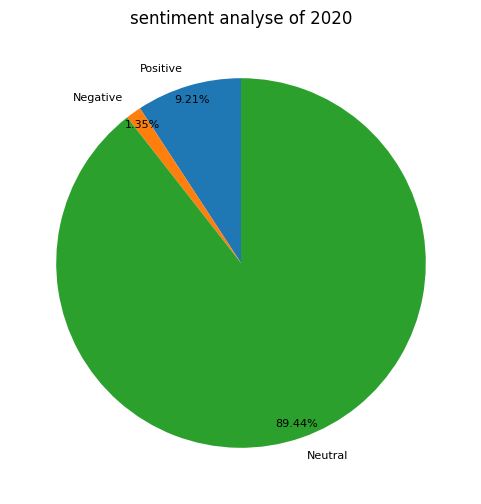

In [ ]:
categories = ['Positive', 'Negative', 'Neutral']
total = count_neg2020 + count_pos2020 + count_neut2020
values = [count_pos2020/total, count_neg2020/total, count_neut2020/total]

plt.figure(figsize=(6, 6))
plt.pie(values, labels=categories, autopct='%2.2f%%', startangle=90, pctdistance=0.92, textprops={'fontsize': 8})
plt.title('sentiment analyse of 2020')
plt.savefig('/content/drive/My Drive/sentimentchart2020.png')
plt.show()

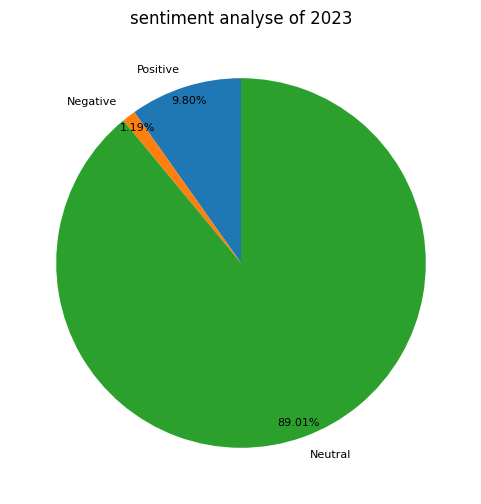

In [ ]:
categories = ['Positive', 'Negative', 'Neutral']
total = count_neg2023 + count_pos2023 + count_neut2023
values = [count_pos2023/total, count_neg2023/total, count_neut2023/total]

plt.figure(figsize=(6, 6))
plt.pie(values, labels=categories, autopct='%2.2f%%', startangle=90, pctdistance=0.92, textprops={'fontsize': 8})
plt.title('sentiment analyse of 2023')
plt.savefig('/content/drive/My Drive/sentimentchart2023.png')
plt.show()

In [21]:
with open('/content/drive/My Drive/word_counts2017.csv', 'r') as file:
        reader = csv.reader(file)
        next(reader)
        wordcounts2017 = sum(int(row[1]) for row in reader)

wordcounts2017_unique = len(pd.read_csv('/content/drive/My Drive/word_counts2017.csv'))
sentence_counts2017 = len(pd.read_csv('/content/drive/My Drive/sentences2017.csv'))

with open('/content/drive/My Drive/word_counts2020.csv', 'r') as file:
        reader = csv.reader(file)
        next(reader)
        wordcounts2020 = sum(int(row[1]) for row in reader)

wordcounts2020_unique = len(pd.read_csv('/content/drive/My Drive/word_counts2020.csv'))
sentence_counts2020 = len(pd.read_csv('/content/drive/My Drive/sentences2020.csv'))

with open('/content/drive/My Drive/word_counts2023.csv', 'r') as file:
        reader = csv.reader(file)
        next(reader)
        wordcounts2023 = sum(int(row[1]) for row in reader)

wordcounts2023_unique = len(pd.read_csv('/content/drive/My Drive/word_counts2023.csv'))
sentence_counts2023 = len(pd.read_csv('/content/drive/My Drive/sentences2023.csv'))

data = [
        ['Label', 'word count', 'unique word count', 'sentence count'],
        ['2017', wordcounts2017, wordcounts2017_unique, sentence_counts2017],
        ['2020', wordcounts2020, wordcounts2020_unique, sentence_counts2020],
        ['2023', wordcounts2023, wordcounts2023_unique, sentence_counts2023]
    ]

with open('/content/drive/My Drive/statics_data2.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data)

data

[['Label', 'word count', 'unique word count', 'sentence count'],
 ['2017', 79058, 17212, 5203],
 ['2020', 118308, 20444, 6274],
 ['2023', 194177, 28396, 9842]]

## Common Uncommon

In [18]:
common17_20 = 0
uncommon17_20 = 0
for word, count in word_counts2017.items():
  if word in word_counts2020:
    common17_20 +=1
  else :
    uncommon17_20 +=1

common17_23 = 0
uncommon17_23 = 0
for word, count in word_counts2017.items():
  if word in word_counts2023:
    common17_23 +=1
  else :
    uncommon17_23 +=1

common20_17 = 0
uncommon20_17 = 0
for word, count in word_counts2020.items():
  if word in word_counts2017:
    common20_17 +=1
  else :
    uncommon20_17 +=1

common20_23 = 0
uncommon20_23 = 0
for word, count in word_counts2020.items():
  if word in word_counts2023:
    common20_23 +=1
  else :
    uncommon20_23 +=1

common23_17 = 0
uncommon23_17 = 0
for word, count in word_counts2023.items():
  if word in word_counts2017:
    common23_17 +=1
  else :
    uncommon23_17 +=1

common23_20 = 0
uncommon23_20 = 0
for word, count in word_counts2023.items():
  if word in word_counts2020:
    common23_20 +=1
  else :
    uncommon23_20 +=1

data = [
        ['Label', 'common word', 'uncommon word'],
        ['2017-2020', common17_20, uncommon17_20],
        ['2017-2023', common17_23, uncommon17_23],
        ['2020-2017', common20_17, uncommon20_17],
        ['2020-2023', common20_23, uncommon20_23],
        ['2023-2017', common23_17, uncommon23_17],
        ['2023-2020', common23_20, uncommon23_20]
    ]

with open('/content/drive/My Drive/common_count.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data)

data

[['Label', 'common word', 'uncommon word'],
 ['2017-2020', 7439, 9773],
 ['2017-2023', 8500, 8712],
 ['2020-2017', 7439, 13005],
 ['2020-2023', 9522, 10922],
 ['2023-2017', 8500, 19896],
 ['2023-2020', 9522, 18874]]

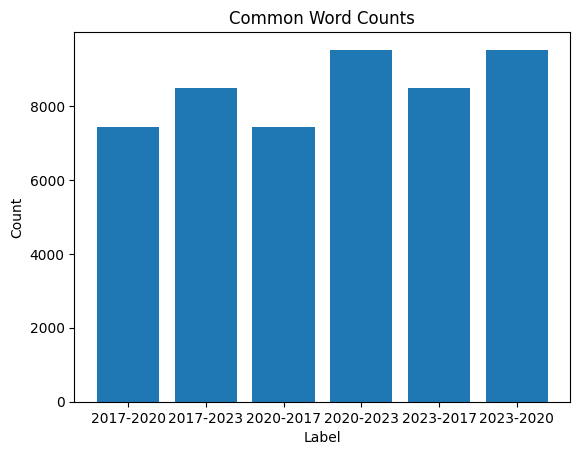

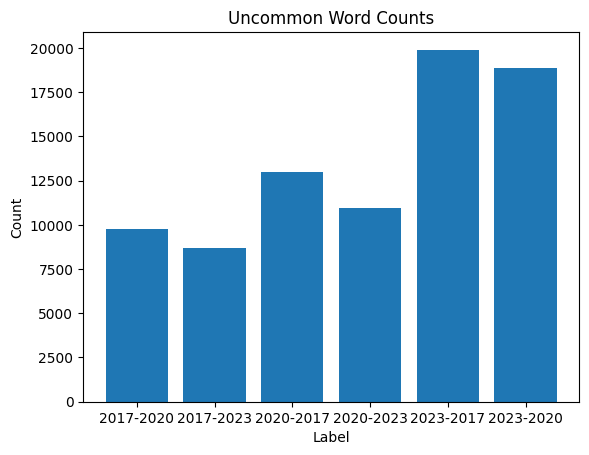

In [20]:
labels = [row[0] for row in data[1:]]
common_word_values = [row[1] for row in data[1:]]
uncommon_word_values = [row[2] for row in data[1:]]

x = range(len(labels))

plt.bar(x, common_word_values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Common Word Counts')
plt.xticks(x, labels)
plt.savefig('/content/drive/My Drive/commonWords.png')
plt.show()

plt.bar(x, uncommon_word_values)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Uncommon Word Counts')
plt.xticks(x, labels)
plt.savefig('/content/drive/My Drive/uncommonWords.png')
plt.show()

## Top10

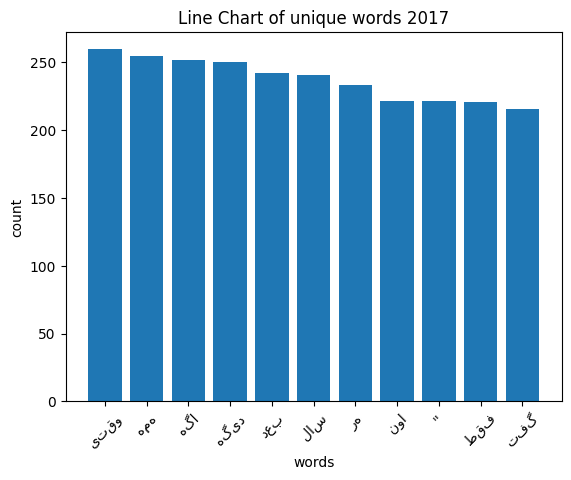

In [60]:
df = pd.read_csv('/content/drive/My Drive/word_counts2017.csv')
sorted_df = df.sort_values(by='Count', ascending=False)
top_10_rows = sorted_df.iloc[20:31]
top_10_rows.to_csv('/content/drive/My Drive/top10_2017.csv', index=False)
plt.bar(top_10_rows['Word'], top_10_rows['Count'])
plt.xlabel('words')
plt.ylabel('count')
plt.title('Line Chart of unique words 2017')
x_labels_display = [get_display(label) for label in top_10_rows['Word']]
plt.xticks(range(len(top_10_rows['Word'])), x_labels_display, rotation=45)
plt.savefig('/content/drive/My Drive/top10chart2017.png')
plt.show()

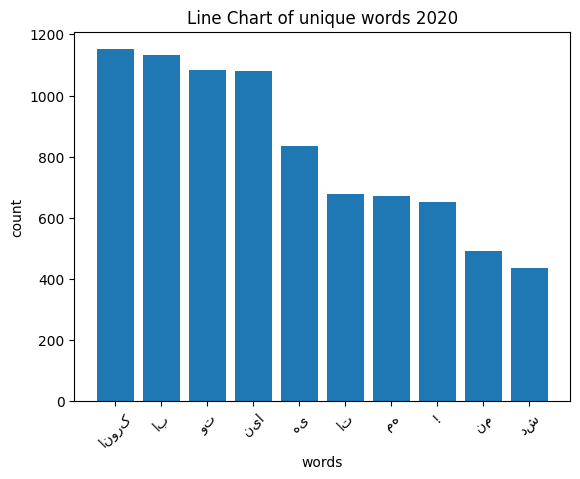

In [61]:
df = pd.read_csv('/content/drive/My Drive/word_counts2020.csv')
sorted_df = df.sort_values(by='Count', ascending=False)
top_10_rows = sorted_df.iloc[9:19]
top_10_rows.to_csv('/content/drive/My Drive/top10_2020.csv', index=False)
plt.bar(top_10_rows['Word'], top_10_rows['Count'])
plt.xlabel('words')
plt.ylabel('count')
plt.title('Line Chart of unique words 2020')
x_labels_display = [get_display(label) for label in top_10_rows['Word']]
plt.xticks(range(len(top_10_rows['Word'])), x_labels_display, rotation=45)
plt.savefig('/content/drive/My Drive/top10chart2020.png')
plt.show()

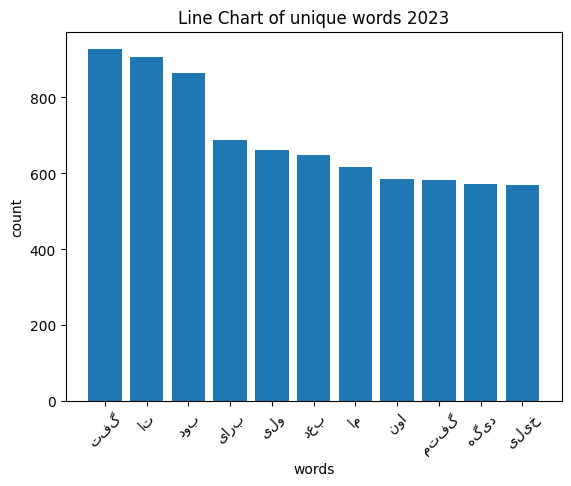

In [62]:
df = pd.read_csv('/content/drive/My Drive/word_counts2023.csv')
sorted_df = df.sort_values(by='Count', ascending=False)
top_10_rows = sorted_df.iloc[16:27]
top_10_rows.to_csv('/content/drive/My Drive/top10_2023.csv', index=False)
plt.bar(top_10_rows['Word'], top_10_rows['Count'])
plt.xlabel('words')
plt.ylabel('count')
plt.title('Line Chart of unique words 2023')
x_labels_display = [get_display(label) for label in top_10_rows['Word']]
plt.xticks(range(len(top_10_rows['Word'])), x_labels_display, rotation=45)
plt.savefig('/content/drive/My Drive/top10chart2023.png')
plt.show()

## RNF

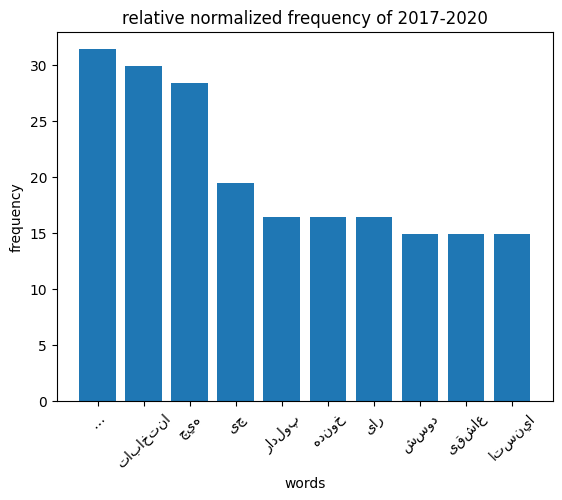

In [54]:
rnf17_20 = defaultdict(int)
for word, count in word_counts2017.items():
  if word in word_counts2020:
    rnf17_20[word] = (count / wordcounts2017) / (word_counts2020[word]/wordcounts2020)

with open('/content/drive/My Drive/rnf17_20.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Word', 'frequency'])

    for word, fre in rnf17_20.items():
        writer.writerow([word, fre])

df = pd.read_csv('/content/drive/My Drive/rnf17_20.csv')
sorted_df = df.sort_values(by='frequency', ascending=False)
top_10_rows = sorted_df.head(10)

plt.bar(top_10_rows['Word'], top_10_rows['frequency'])
plt.xlabel('words')
plt.ylabel('frequency')
plt.title('relative normalized frequency of 2017-2020')
x_labels_display = [get_display(label) for label in top_10_rows['Word']]
plt.xticks(range(len(top_10_rows['Word'])), x_labels_display, rotation=45)
plt.savefig('/content/drive/My Drive/rnf17_20.png')
plt.show()

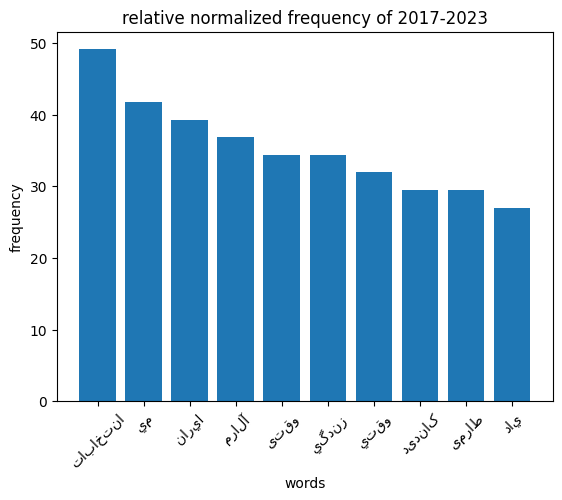

In [55]:
rnf17_23 = defaultdict(int)
for word, count in word_counts2017.items():
  if word in word_counts2023:
    rnf17_23[word] = (count / wordcounts2017) / (word_counts2023[word]/wordcounts2023)

with open('/content/drive/My Drive/rnf17_23.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Word', 'frequency'])

    for word, fre in rnf17_23.items():
        writer.writerow([word, fre])

df = pd.read_csv('/content/drive/My Drive/rnf17_23.csv')
sorted_df = df.sort_values(by='frequency', ascending=False)
top_10_rows = sorted_df.head(10)

plt.bar(top_10_rows['Word'], top_10_rows['frequency'])
plt.xlabel('words')
plt.ylabel('frequency')
plt.title('relative normalized frequency of 2017-2023')
x_labels_display = [get_display(label) for label in top_10_rows['Word']]
plt.xticks(range(len(top_10_rows['Word'])), x_labels_display, rotation=45)
plt.savefig('/content/drive/My Drive/rnf17_23.png')
plt.show()

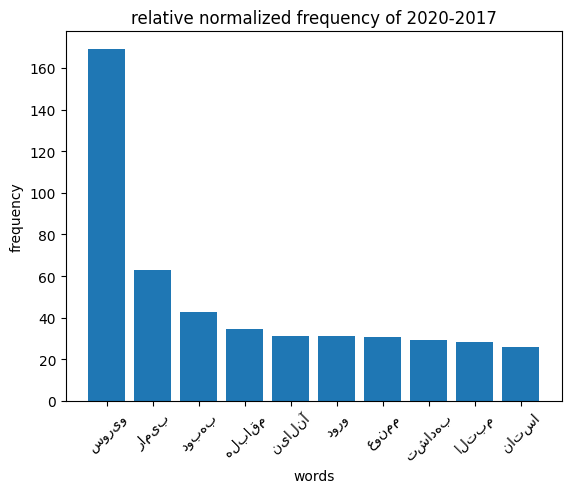

In [56]:
rnf20_17 = defaultdict(int)
for word, count in word_counts2020.items():
  if word in word_counts2017:
    rnf20_17[word] = (count / wordcounts2020) / (word_counts2017[word]/wordcounts2017)

with open('/content/drive/My Drive/rnf20_17.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Word', 'frequency'])

    for word, fre in rnf20_17.items():
        writer.writerow([word, fre])

df = pd.read_csv('/content/drive/My Drive/rnf20_17.csv')
sorted_df = df.sort_values(by='frequency', ascending=False)
top_10_rows = sorted_df.head(10)

plt.bar(top_10_rows['Word'], top_10_rows['frequency'])
plt.xlabel('words')
plt.ylabel('frequency')
plt.title('relative normalized frequency of 2020-2017')
x_labels_display = [get_display(label) for label in top_10_rows['Word']]
plt.xticks(range(len(top_10_rows['Word'])), x_labels_display, rotation=45)
plt.savefig('/content/drive/My Drive/rnf20_17.png')
plt.show()

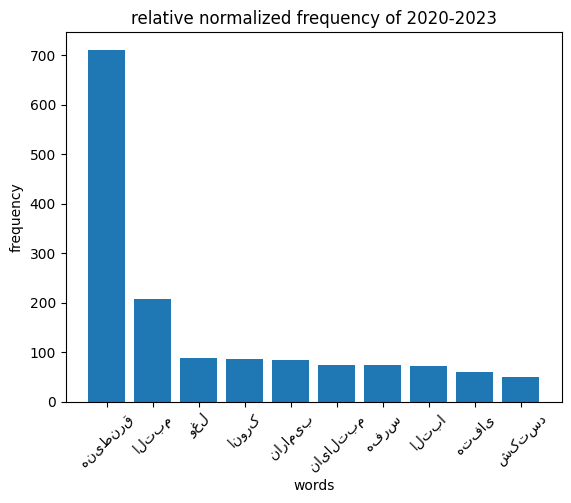

In [57]:
rnf20_23 = defaultdict(int)
for word, count in word_counts2020.items():
  if word in word_counts2023:
    rnf20_23[word] = (count / wordcounts2020) / (word_counts2023[word]/wordcounts2023)

with open('/content/drive/My Drive/rnf20_23.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Word', 'frequency'])

    for word, fre in rnf20_23.items():
        writer.writerow([word, fre])

df = pd.read_csv('/content/drive/My Drive/rnf20_23.csv')
sorted_df = df.sort_values(by='frequency', ascending=False)
top_10_rows = sorted_df.head(10)

plt.bar(top_10_rows['Word'], top_10_rows['frequency'])
plt.xlabel('words')
plt.ylabel('frequency')
plt.title('relative normalized frequency of 2020-2023')
x_labels_display = [get_display(label) for label in top_10_rows['Word']]
plt.xticks(range(len(top_10_rows['Word'])), x_labels_display, rotation=45)
plt.savefig('/content/drive/My Drive/rnf20_23.png')
plt.show()

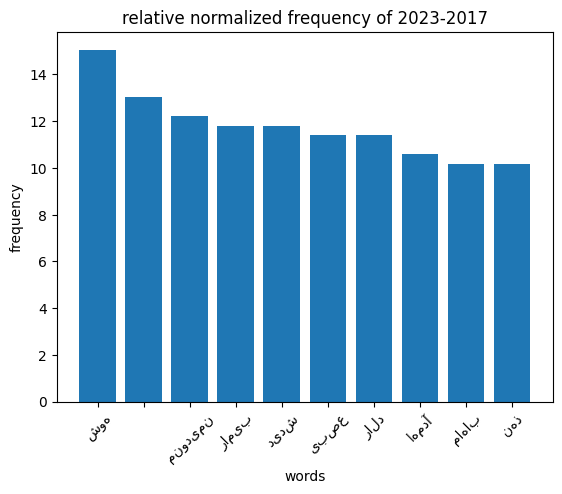

In [58]:
rnf23_17 = defaultdict(int)
for word, count in word_counts2023.items():
  if word in word_counts2017:
    rnf23_17[word] = (count / wordcounts2023) / (word_counts2017[word]/wordcounts2017)

with open('/content/drive/My Drive/rnf23_17.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Word', 'frequency'])

    for word, fre in rnf23_17.items():
        writer.writerow([word, fre])

df = pd.read_csv('/content/drive/My Drive/rnf23_17.csv')
sorted_df = df.sort_values(by='frequency', ascending=False)
top_10_rows = sorted_df.head(10)

plt.bar(top_10_rows['Word'], top_10_rows['frequency'])
plt.xlabel('words')
plt.ylabel('frequency')
plt.title('relative normalized frequency of 2023-2017')
x_labels_display = [get_display(label) for label in top_10_rows['Word']]
plt.xticks(range(len(top_10_rows['Word'])), x_labels_display, rotation=45)
plt.savefig('/content/drive/My Drive/rnf23_17.png')
plt.show()

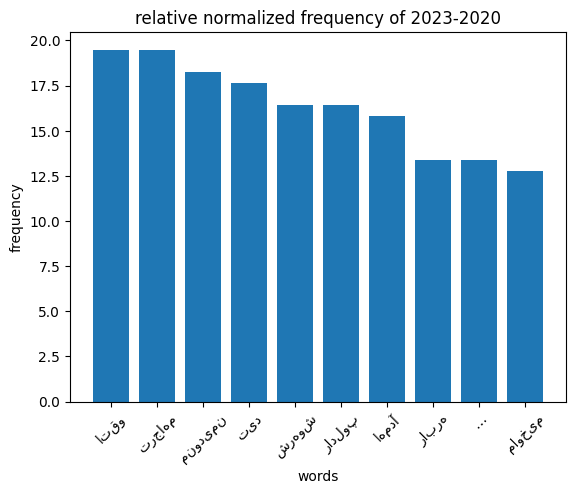

In [59]:
rnf23_20 = defaultdict(int)
for word, count in word_counts2023.items():
  if word in word_counts2020:
    rnf23_20[word] = (count / wordcounts2023) / (word_counts2020[word]/wordcounts2020)

with open('/content/drive/My Drive/rnf23_20.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Word', 'frequency'])

    for word, fre in rnf23_20.items():
        writer.writerow([word, fre])

df = pd.read_csv('/content/drive/My Drive/rnf23_20.csv')
sorted_df = df.sort_values(by='frequency', ascending=False)
top_10_rows = sorted_df.head(10)

plt.bar(top_10_rows['Word'], top_10_rows['frequency'])
plt.xlabel('words')
plt.ylabel('frequency')
plt.title('relative normalized frequency of 2023-2020')
x_labels_display = [get_display(label) for label in top_10_rows['Word']]
plt.xticks(range(len(top_10_rows['Word'])), x_labels_display, rotation=45)
plt.savefig('/content/drive/My Drive/rnf23_20.png')
plt.show()

## TF-IDF

In [37]:
import math

idf = defaultdict(int)
for word, count in word_countsAll.items():
  countAll = 0
  if word in word_counts2017:
    countAll +=1
  if word in word_counts2020:
    countAll +=1
  if word in word_counts2023:
    countAll +=1
  idf[word] = math.log(3 / countAll)

In [38]:
tf2017 = defaultdict(int)
for word, count in word_counts2017.items():
  tf2017[word] = count / wordcounts2017

tf2020 = defaultdict(int)
for word, count in word_counts2020.items():
  tf2020[word] = count / wordcounts2020

tf2023 = defaultdict(int)
for word, count in word_counts2023.items():
  tf2023[word] = count / wordcounts2023

In [39]:
tfidf2017 = defaultdict(int)
for word, count in word_counts2017.items():
  tfidf2017[word] = tf2017[word] * idf[word]

tfidf2020 = defaultdict(int)
for word, count in word_counts2020.items():
  tfidf2020[word] = tf2020[word] * idf[word]

tfidf2023 = defaultdict(int)
for word, count in word_counts2023.items():
  tfidf2023[word] = tf2023[word] * idf[word]

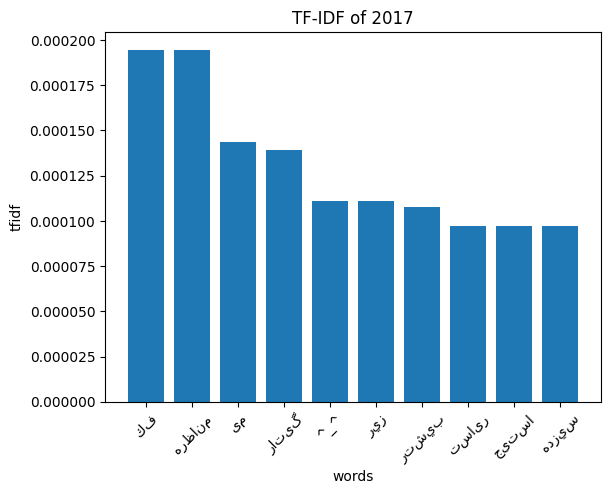

In [53]:
with open('/content/drive/My Drive/tfidf17.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Word', 'tfidf'])

    for word, tfidf in tfidf2017.items():
        writer.writerow([word, tfidf])

df = pd.read_csv('/content/drive/My Drive/tfidf17.csv')
sorted_df = df.sort_values(by='tfidf', ascending=False)
top_10_rows = sorted_df.head(10)

plt.bar(top_10_rows['Word'], top_10_rows['tfidf'])
plt.xlabel('words')
plt.ylabel('tfidf')
plt.title('TF-IDF of 2017')
x_labels_display = [get_display(label) for label in top_10_rows['Word']]
plt.xticks(range(len(top_10_rows['Word'])), x_labels_display, rotation=45)
plt.savefig('/content/drive/My Drive/tfidf17.png')
plt.show()

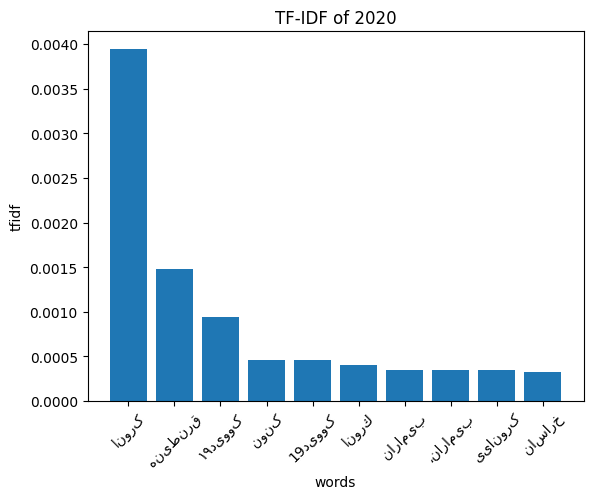

In [51]:
with open('/content/drive/My Drive/tfidf20.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Word', 'tfidf'])

    for word, tfidf in tfidf2020.items():
        writer.writerow([word, tfidf])

df = pd.read_csv('/content/drive/My Drive/tfidf20.csv')
sorted_df = df.sort_values(by='tfidf', ascending=False)
top_10_rows = sorted_df.head(10)

plt.bar(top_10_rows['Word'], top_10_rows['tfidf'])
plt.xlabel('words')
plt.ylabel('tfidf')
plt.title('TF-IDF of 2020')
x_labels_display = [get_display(label) for label in top_10_rows['Word']]
plt.xticks(range(len(top_10_rows['Word'])), x_labels_display, rotation=45)
plt.savefig('/content/drive/My Drive/tfidf20.png')
plt.show()

<ipython-input-52-ab016d035e32>:18: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  plt.savefig('/content/drive/My Drive/tfidf23.png')
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


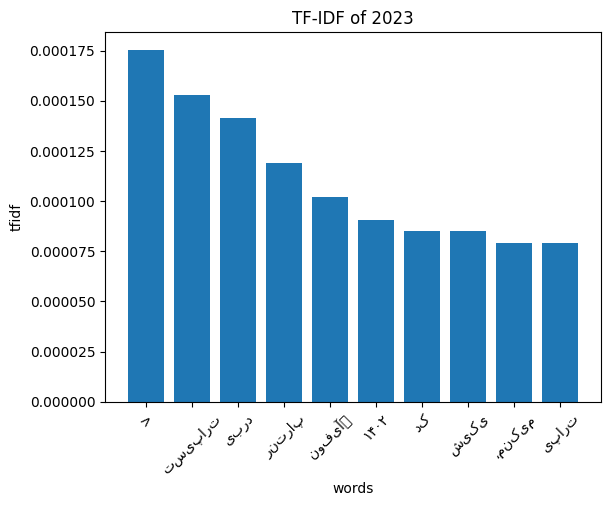

In [52]:
with open('/content/drive/My Drive/tfidf23.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Word', 'tfidf'])

    for word, tfidf in tfidf2023.items():
        writer.writerow([word, tfidf])

df = pd.read_csv('/content/drive/My Drive/tfidf23.csv')
sorted_df = df.sort_values(by='tfidf', ascending=False)
top_10_rows = sorted_df.head(10)

plt.bar(top_10_rows['Word'], top_10_rows['tfidf'])
plt.xlabel('words')
plt.ylabel('tfidf')
plt.title('TF-IDF of 2023')
x_labels_display = [get_display(label) for label in top_10_rows['Word']]
plt.xticks(range(len(top_10_rows['Word'])), x_labels_display, rotation=45)
plt.savefig('/content/drive/My Drive/tfidf23.png')
plt.show()

## histogram

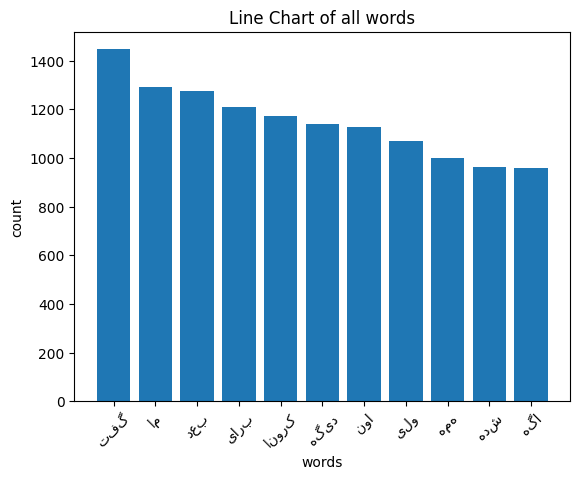

In [65]:
df = pd.read_csv('/content/drive/My Drive/word_countsAll.csv')
sorted_df = df.sort_values(by='Count', ascending=False)
top_10_rows = sorted_df.iloc[18:29]
top_10_rows.to_csv('/content/drive/My Drive/top10_All.csv', index=False)
plt.bar(top_10_rows['Word'], top_10_rows['Count'])
plt.xlabel('words')
plt.ylabel('count')
plt.title('Line Chart of all words')
x_labels_display = [get_display(label) for label in top_10_rows['Word']]
plt.xticks(range(len(top_10_rows['Word'])), x_labels_display, rotation=45)
plt.savefig('/content/drive/My Drive/top10chartAll.png')
plt.show()